In [2]:
# imports 
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

(300, 300, 3)


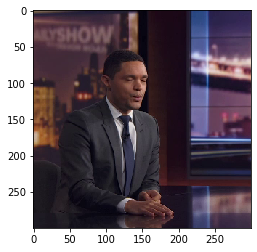

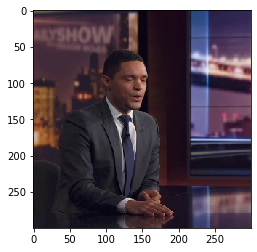

(300, 300, 3)
(300, 300, 3)


(300, 300, 2)

In [8]:
# Crop, Reshape and Save the video 
cap = cv.VideoCapture("output.mp4")
ret, frame1 = cap.read()
print(frame1.shape)
#for i in range( 5 ):
#    _, _ = cap.read()
ret, frame2 = cap.read()
frame1 = cv.cvtColor(frame1,cv.COLOR_BGR2RGB)
plt.imshow(frame1)
plt.show()
frame2 = cv.cvtColor(frame2,cv.COLOR_BGR2RGB)
plt.imshow(frame2)
plt.show()

print(frame1.shape)
print(frame2.shape)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
prev = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
flow = cv.calcOpticalFlowFarneback(prev, next, None, 0.5, 3, 15, 3, 5, 1.2, 0) 


flow.shape


In [3]:
print(flow[:,:,0])

[[ 1.3952114e-06  2.7587030e-06  4.9304763e-06 ...  2.6569742e-04
   4.3342827e-04  5.5125786e-04]
 [ 1.9311167e-06  3.7358334e-06  6.6149064e-06 ... -6.5833866e-04
  -4.4491020e-04 -5.7699704e-05]
 [ 2.4355425e-06  4.6408509e-06  8.1815633e-06 ... -1.0694338e-03
  -8.6097739e-04 -3.7427101e-04]
 ...
 [ 3.5995176e-06  4.0879745e-06 -2.8362504e-07 ... -6.7496421e-07
  -2.4358062e-06 -3.5681105e-06]
 [ 3.2481041e-06  3.5498804e-06 -4.9647360e-07 ... -5.6964484e-07
  -2.0246700e-06 -2.8932341e-06]
 [ 2.8893196e-06  3.1533211e-06 -1.0199946e-06 ... -6.0035705e-07
  -1.9914557e-06 -2.7756487e-06]]


In [4]:
print(flow[:,:,1])

[[ 6.8568703e-08  2.0538690e-07  4.9739793e-07 ... -1.1155036e-03
  -8.7476015e-04 -8.4691570e-04]
 [ 7.8774427e-08  2.7590460e-07  6.8686654e-07 ... -1.4313213e-03
  -1.1394871e-03 -1.0998369e-03]
 [ 7.2973052e-08  3.2684292e-07  8.6965201e-07 ... -1.5094015e-03
  -1.2119068e-03 -1.1705745e-03]
 ...
 [-6.0836528e-06 -8.5526899e-06 -1.1732471e-05 ... -1.2765331e-07
  -1.7265543e-07 -2.2141705e-07]
 [-5.4515863e-06 -7.9977608e-06 -1.1566393e-05 ... -5.8746997e-07
  -5.8022619e-07 -5.7066393e-07]
 [-4.3893510e-06 -6.7721799e-06 -1.0274705e-05 ... -9.1411852e-07
  -8.7257661e-07 -8.2466181e-07]]


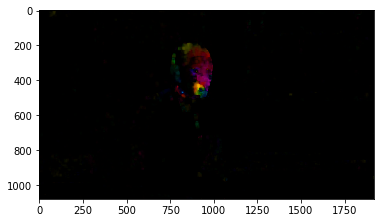

In [5]:
# Display Optical Flow
mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
plt.imshow(bgr)
plt.show()

In [6]:
flow_my = flow

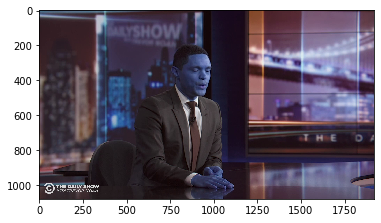

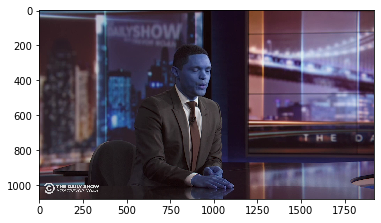

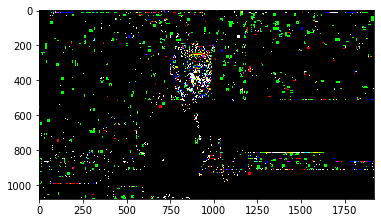

In [8]:
# Frame Reconstruction to test optical flow and residual 

h, w = flow_my.shape[:2]
flow = -flow_my
flow[:,:,0] += np.arange(w)
flow[:,:,1] += np.arange(h)[:,np.newaxis]
p_frame = cv.remap(frame1, flow, None, cv.INTER_LINEAR)
plt.imshow(frame2)
plt.show()
plt.imshow(p_frame)
plt.show()
plt.imshow(frame2-p_frame)
plt.show()

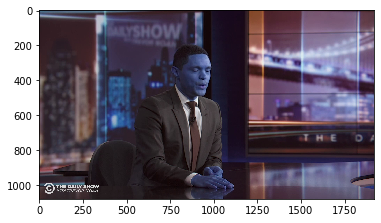

In [10]:
# reconstructed frame with residual 
res = frame2 - p_frame
plt.imshow(p_frame + res)